In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
## Download the mouse TFs (Mus_musculus_TF.txt) from AnimalTFDB v4.0 (https://guolab.wchscu.cn/AnimalTFDB4) - 1611 TFs

In [3]:
tf_all = pd.read_csv('Mus_musculus_TF.txt', sep='\t')['Symbol'].str.upper().to_list()

In [4]:
tf_all[:10], len(tf_all)

(['LIN28B',
  'TBX2',
  'DMTF1',
  'IRX4',
  'IRF3',
  'GM14391',
  'ZFP507',
  'ZFP981',
  'IRF2',
  'ZFX'],
 1611)

In [5]:
names = ['Lisa', 'DS']

In [6]:
# Lisa chipseq
lisa = pd.read_csv('Lisa_chipseq_fisher_combine_dedup.csv')

In [7]:
lisa = lisa.sort_values(by='0', ascending=True)

In [8]:
lisa['TF'] = lisa['TF'].str.upper()

In [9]:
lisa.index = lisa['TF']

In [10]:
lisa

,Unnamed: 0,0,TF
TF,,,
RELA,41454|RELA,1.957373e-125,RELA
STAT1,5377|STAT1,1.348966e-114,STAT1
JUNB,38452|JUNB,4.138106e-113,JUNB
SPI1,41465|SPI1,3.188620e-106,SPI1
ERG,52852|ERG,6.536744e-98,ERG
...,...,...,...
ONECUT1,54552|ONECUT1,9.617099e-01,ONECUT1
GABPA,56061|GABPA,9.825129e-01,GABPA
MYF5,9241|MYF5,9.835141e-01,MYF5


In [11]:
# Lisa motif
lisa1 = pd.read_csv('Lisa_motif_fisher_combine_dedup.csv')

In [12]:
lisa1 = lisa1.sort_values(by='0', ascending=True)

In [13]:
lisa1['TF'] = lisa1['TF'].str.upper()

In [14]:
lisa1.index = lisa1['TF']

In [15]:
lisa1

,Unnamed: 0,0,TF
TF,,,
ZIC1,UP00102|ZIC1,5.349917e-19,ZIC1
TCFAP2A,MS00239|Tcfap2a,2.627126e-18,TCFAP2A
TFAP2B,MS00228|TFAP2B,3.246930e-18,TFAP2B
SPI1,MC00506|Spi1,6.881229e-17,SPI1
SFPI1,MC00180|Sfpi1,6.881229e-17,SFPI1
...,...,...,...
PROP1,MS00597|PROP1,9.999891e-01,PROP1
ONECUT2,MS00679|ONECUT2,9.999921e-01,ONECUT2
SATB1,M01723|SATB1,9.999945e-01,SATB1


In [16]:
# de

In [17]:
de = pd.read_csv('edgeR_DE.txt', sep='\t')

In [18]:
de = de.sort_values(by='FDR', ascending=True)

In [19]:
de['Symbol'] = de['Symbol'].str.upper()

In [20]:
de.index = de['Symbol']

In [21]:
de

,Symbol,logFC,unshrunk.logFC,logCPM,PValue,FDR
Symbol,,,,,,
ARG1,ARG1,10.008072,10.173598,6.574172,5.640000e-37,1.160000e-32
TNC,TNC,6.906046,6.912264,8.661264,1.320000e-31,1.360000e-27
SERPINB1A,SERPINB1A,3.865198,3.867476,4.281614,8.550000e-31,5.880000e-27
TIMP1,TIMP1,6.098237,6.109230,5.813447,1.520000e-29,7.860000e-26
LOX,LOX,4.692380,4.698509,7.021865,1.370000e-26,5.670000e-23
...,...,...,...,...,...,...
SLC39A8,SLC39A8,1.766091,1.772803,3.738619,1.606467e-03,4.804732e-02
APOL8,APOL8,3.168995,3.317851,1.366914,1.608855e-03,4.804913e-02
ARHGAP11A,ARHGAP11A,1.891850,1.898444,4.973198,1.672704e-03,4.966847e-02


In [22]:
# DS

In [23]:
ds = pd.read_csv('MIP56_Myo_DS.csv')

In [24]:
ds['Gene'] = ds['Gene'].str.upper()

In [25]:
ds.index = ds['Gene']

In [26]:
ds

,Gene,MIP56_Myo_DS
Gene,,
GATA4,GATA4,3.356569
NKX2-5,NKX2-5,1.698771
TBX5,TBX5,1.448722
IRX4,IRX4,1.103291
NTN1,NTN1,1.075143
...,...,...
AGTR1B,AGTR1B,0.000000
GM27660,GM27660,0.000000
GM23709,GM23709,0.000000


In [27]:
genes_sorted = {}

In [28]:
#genes_sorted['Lisa_chipseq'] = list(set(lisa['TF']) & set(tf_all))
#genes_sorted['Lisa_motif'] = list(set(lisa1['TF']) & set(tf_all))
#genes_sorted['DE'] = list(set(de['FDR']) & set(tf_all))
#genes_sorted['DS'] = list(set(ds['Gene']) & set(tf_all))
genes_sorted['Lisa_chipseq'] = [gene for gene in lisa['TF'] if gene in tf_all]
genes_sorted['Lisa_motif'] = [gene for gene in lisa1['TF'] if gene in tf_all]
genes_sorted['DS'] = [gene for gene in ds['Gene'] if gene in tf_all]

In [29]:
genes_sorted

{'Lisa_chipseq': ['RELA',
  'STAT1',
  'JUNB',
  'SPI1',
  'ERG',
  'IRF4',
  'FLI1',
  'CEBPA',
  'CEBPB',
  'RXRA',
  'NCOR2',
  'IRF8',
  'PPARG',
  'JUN',
  'BATF',
  'T',
  'STAT6',
  'NR1D2',
  'MEIS1',
  'STAT5B',
  'BATF3',
  'NR3C1',
  'HOXB4',
  'IRF1',
  'STAT3',
  'STAT2',
  'FOSL2',
  'RUNX1',
  'JUND',
  'STAT5A',
  'GFI1',
  'NFATC2',
  'MAF',
  'BCL6',
  'KLF5',
  'TGIF1',
  'SPIB',
  'ETS1',
  'BHLHE40',
  'E2F4',
  'MYOD1',
  'PBX1',
  'IRF3',
  'VDR',
  'IKZF1',
  'TBX21',
  'BACH2',
  'STAT4',
  'RORA',
  'TCF7L1',
  'GATA2',
  'NR6A1',
  'PAX5',
  'MYB',
  'CTCF',
  'KLF15',
  'RORC',
  'KLF4',
  'HOXA9',
  'MAFK',
  'MYC',
  'RUNX2',
  'TEAD2',
  'SOX9',
  'ESR1',
  'TAL1',
  'NR1D1',
  'MSX1',
  'EBF1',
  'GATA3',
  'RUNX3',
  'MXI1',
  'E2F3',
  'RCOR1',
  'ATF3',
  'GATA1',
  'SRF',
  'MAX',
  'KLF3',
  'MAFF',
  'SOX2',
  'RXRG',
  'ATF4',
  'USF2',
  'MITF',
  'NANOG',
  'ATF2',
  'TFAP2C',
  'CEBPG',
  'MTA2',
  'ZBTB17',
  'EGR2',
  'ZFP57',
  'E2F1',
  'HE

In [31]:
# Mouse TFs in GO:0007507
positives_ = pd.read_csv('TFs_GO0007507.csv')
positives = positives_['Symbol'].str.upper().to_list()

In [32]:
positives[:10], len(positives)

(['IRX4',
  'FOXJ1',
  'NFATC1',
  'POU4F2',
  'NFATC4',
  'SALL1',
  'ZIC3',
  'SOX9',
  'RXRA',
  'SALL4'],
 56)

In [34]:
def get_binary_labels(ranked_genes, ground_truth):
    labels = [1 if gene in ground_truth else 0 for gene in ranked_genes]
    return np.array(labels)

# Initialize plot settings
plt.style.use('ggplot')

# Colors for each tool (you can add more if needed)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


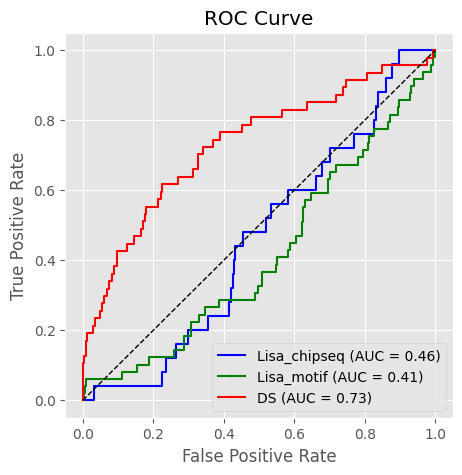

In [35]:
# 1. Plot ROC Curves
plt.figure(figsize=(5, 5))

#plt.subplot(1, 2, 1)  # Left: ROC curve
for i, (tool, ranked_genes) in enumerate(genes_sorted.items()):
    labels = get_binary_labels(ranked_genes, positives)
    scores = np.linspace(1, 0, len(labels))  # Assume decreasing scores based on rank

    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'{tool} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC_TFs_in_7507.pdf', format='pdf')
plt.show()